In [2]:
!pip install textblob
import nltk
nltk.download('punkt')


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   --------------------------- ------------ 1.0/1.5 MB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.5 MB/s eta 0:00:00

   ---------------------------------------- 0/3 [regex]
   ---------------------------------------- 0/3 [regex]
   ---------------------------------------- 0/3 [regex]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------- 1/3 [nltk]
   ------------- -------------------------

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [3]:
#  Step 1: Load Data
import pandas as pd
import string
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/raw/customer_support_tickets.csv")
df.head()


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [4]:
#  Step 2: Preprocess Text (lowercase + remove punctuation)
def simple_clean(text):
    text = str(text).lower()
    return text.translate(str.maketrans('', '', string.punctuation))

df["Cleaned_Description"] = df["Ticket Description"].apply(simple_clean)
df[["Ticket Description", "Cleaned_Description"]].head()


,Ticket Description,Cleaned_Description
0,I'm having an issue with the {product_purchase...,im having an issue with the productpurchased p...
1,I'm having an issue with the {product_purchase...,im having an issue with the productpurchased p...
2,I'm facing a problem with my {product_purchase...,im facing a problem with my productpurchased t...
3,I'm having an issue with the {product_purchase...,im having an issue with the productpurchased p...
4,I'm having an issue with the {product_purchase...,im having an issue with the productpurchased p...


In [5]:
#  Step 3: Sentiment Analysis using TextBlob
df["Sentiment_Score"] = df["Cleaned_Description"].apply(lambda x: TextBlob(x).sentiment.polarity)
df[["Cleaned_Description", "Sentiment_Score"]].head()


,Cleaned_Description,Sentiment_Score
0,im having an issue with the productpurchased p...,0.000000e+00
1,im having an issue with the productpurchased p...,1.305556e-01
2,im facing a problem with my productpurchased t...,2.479167e-01
3,im having an issue with the productpurchased p...,2.500000e-01
4,im having an issue with the productpurchased p...,-7.930164e-18


In [14]:
import pandas as pd
from textblob import TextBlob
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load data if not already loaded
# df = pd.read_csv("../data/raw/customer_support_tickets.csv")

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()  # lowercase
    text = text.translate(str.maketrans("", "", string.punctuation))  # remove punctuation
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
    return " ".join(tokens)

# Clean Ticket Description
df["Cleaned_Description"] = df["Ticket Description"].apply(clean_text)

# Compute Sentiment Score using TextBlob
df["Sentiment_Score"] = df["Cleaned_Description"].apply(lambda x: TextBlob(x).sentiment.polarity)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


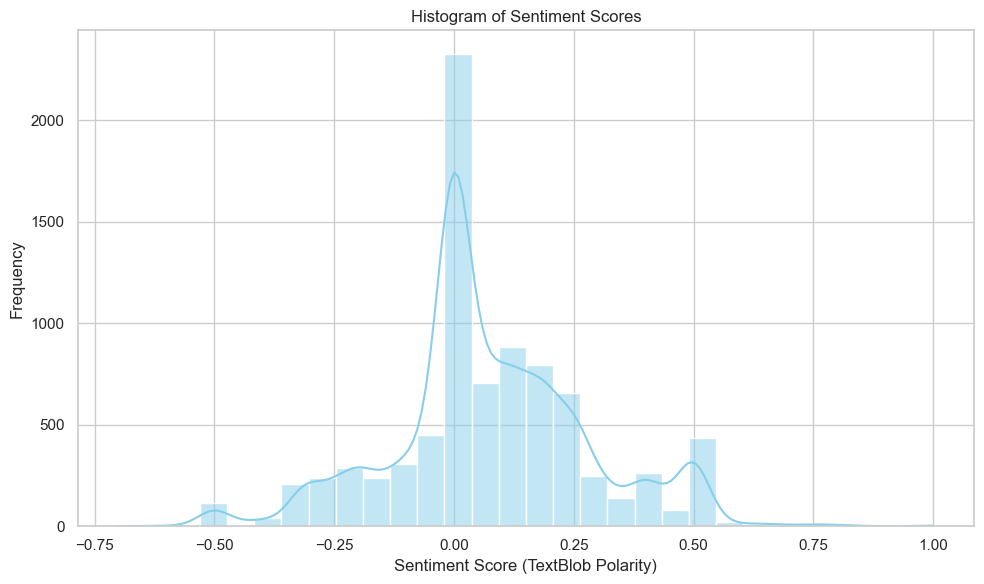

In [15]:
#  Step 4: Histogram of Sentiment Scores
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df["Sentiment_Score"], bins=30, kde=True, color="skyblue")
plt.title("Histogram of Sentiment Scores")
plt.xlabel("Sentiment Score (TextBlob Polarity)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("../visuals/sentiment_histogram.png")
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_27944\1048256217.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_boxplot["Customer Satisfaction Rating"] = df_boxplot["Customer Satisfaction Rating"].astype(str)
C:\Users\Hp\AppData\Local\Temp\ipykernel_27944\1048256217.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Customer Satisfaction Rating", y="Sentiment_Score", data=df_boxplot, palette="Set2")


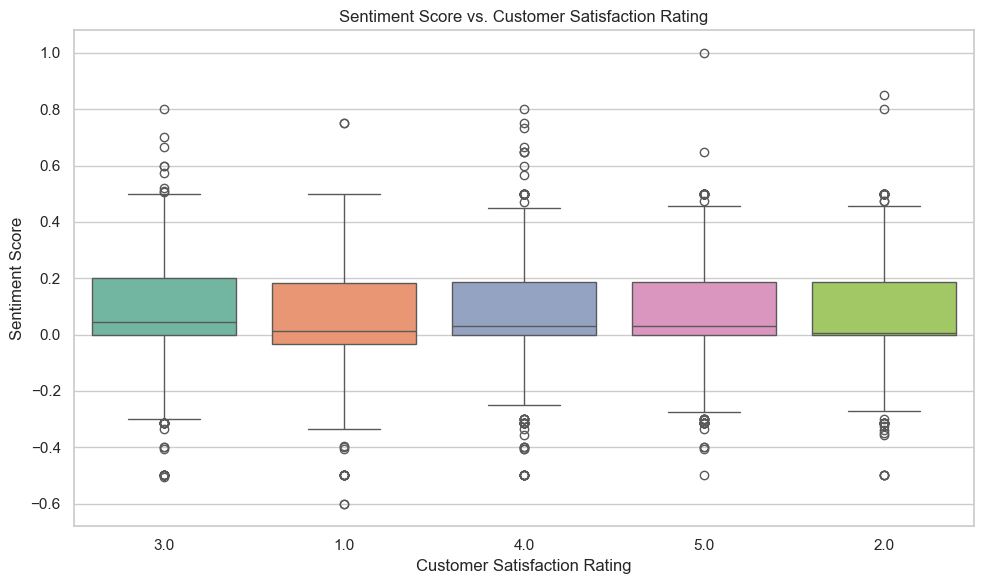

In [19]:
#  Step 5: Boxplot of Sentiment Score vs. Satisfaction
df_boxplot = df.dropna(subset=["Customer Satisfaction Rating"])
df_boxplot["Customer Satisfaction Rating"] = df_boxplot["Customer Satisfaction Rating"].astype(str)

plt.figure(figsize=(10, 6))
sns.boxplot(x="Customer Satisfaction Rating", y="Sentiment_Score", data=df_boxplot, palette="Set2")
plt.title("Sentiment Score vs. Customer Satisfaction Rating")
plt.xlabel("Customer Satisfaction Rating")
plt.ylabel("Sentiment Score")
plt.tight_layout()
plt.savefig("../visuals/sentiment_vs_rating.png")
plt.show()



Customer Gender Sentiment Averages:
 Customer Gender
Other     0.072420
Female    0.072805
Male      0.076308
Name: Sentiment_Score, dtype: float64


C:\Users\Hp\AppData\Local\Temp\ipykernel_27944\1842664651.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_by_group.index, y=sentiment_by_group.values, palette="viridis")


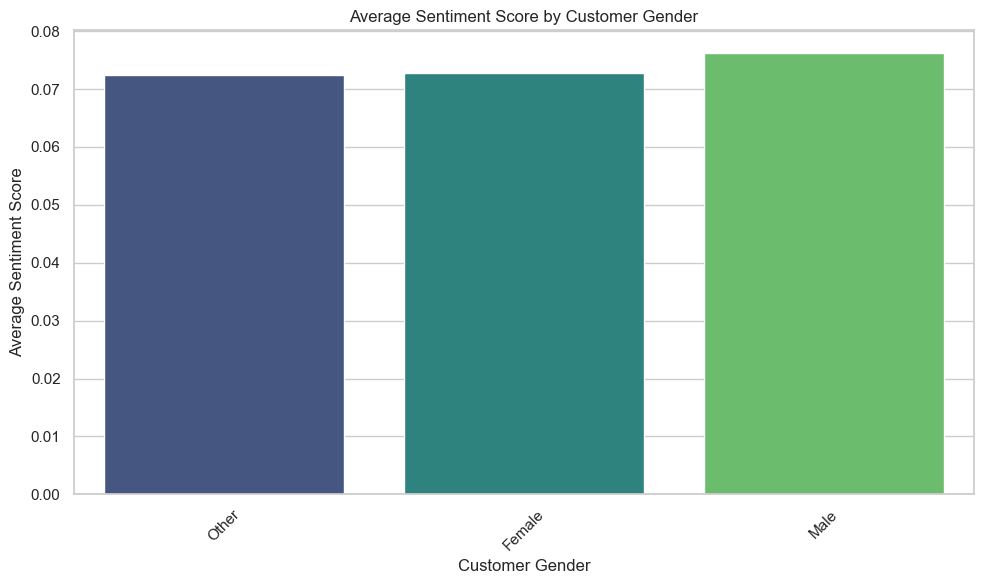


Product Purchased Sentiment Averages:
 Product Purchased
Samsung Galaxy                    0.041033
Garmin Forerunner                 0.049030
Roomba Robot Vacuum               0.050973
Asus ROG                          0.051466
Microsoft Surface                 0.053155
Canon EOS                         0.059855
Sony Xperia                       0.060543
Samsung Soundbar                  0.062212
Bose SoundLink Speaker            0.062381
Amazon Echo                       0.062808
Canon DSLR Camera                 0.062819
Google Nest                       0.064875
GoPro Action Camera               0.065420
Autodesk AutoCAD                  0.065638
HP Pavilion                       0.067180
LG OLED                           0.067773
Amazon Kindle                     0.069017
Sony 4K HDR TV                    0.069250
Nikon D                           0.069938
Nest Thermostat                   0.070528
Apple AirPods                     0.070819
Fitbit Versa Smartwatch           0.071

C:\Users\Hp\AppData\Local\Temp\ipykernel_27944\1842664651.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_by_group.index, y=sentiment_by_group.values, palette="viridis")


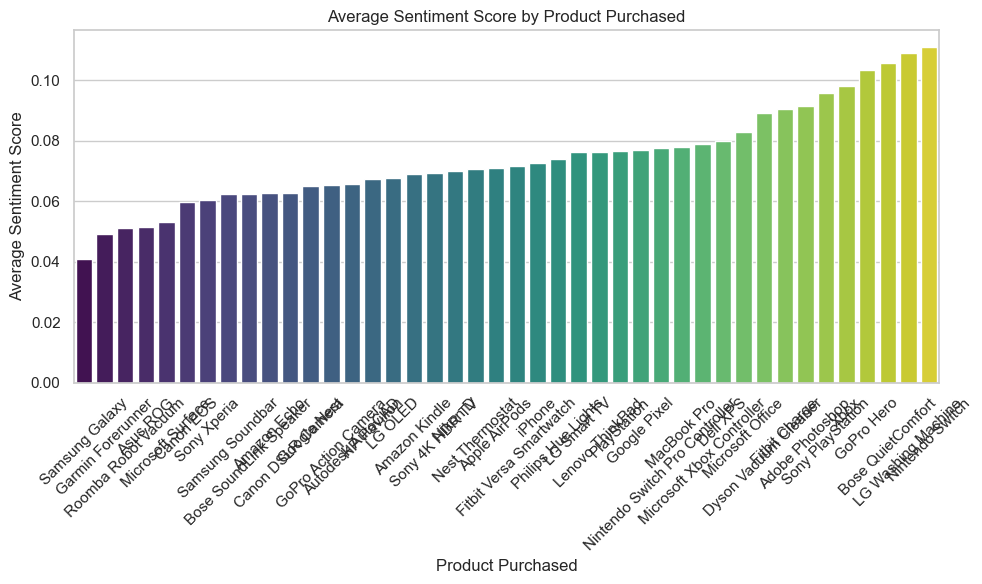


Ticket Type Sentiment Averages:
 Ticket Type
Technical issue         0.064244
Cancellation request    0.069887
Refund request          0.075595
Product inquiry         0.079370
Billing inquiry         0.080979
Name: Sentiment_Score, dtype: float64


C:\Users\Hp\AppData\Local\Temp\ipykernel_27944\1842664651.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_by_group.index, y=sentiment_by_group.values, palette="viridis")


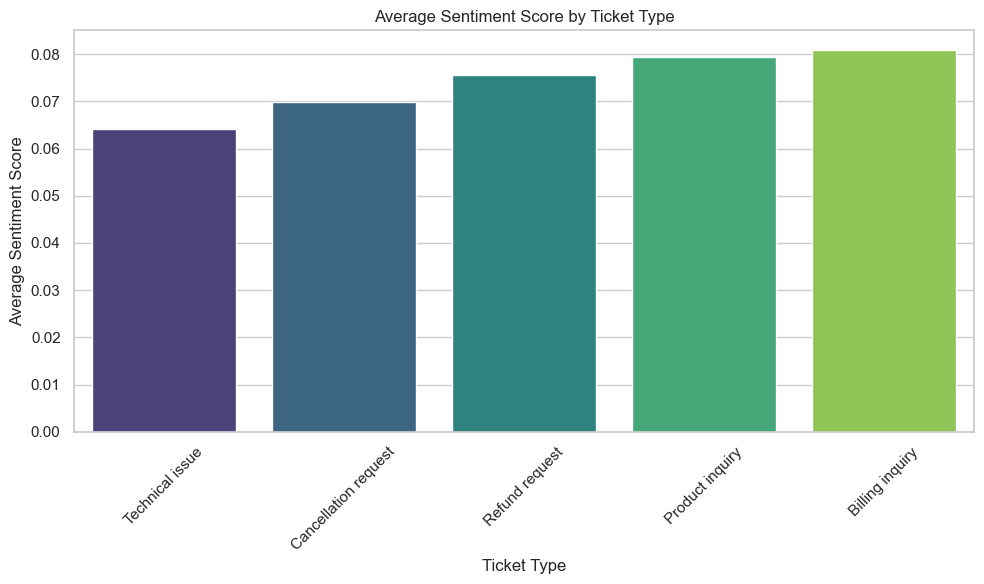

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

group_columns = ["Customer Gender", "Product Purchased", "Ticket Type"]
for col in group_columns:
    if col in df.columns:
        plt.figure(figsize=(10, 6))
        sentiment_by_group = df.groupby(col)["Sentiment_Score"].mean().sort_values()
        print(f"\n{col} Sentiment Averages:\n", sentiment_by_group)

        if not sentiment_by_group.empty:
            sns.barplot(x=sentiment_by_group.index, y=sentiment_by_group.values, palette="viridis")
            plt.title(f"Average Sentiment Score by {col}")
            plt.xlabel(col)
            plt.ylabel("Average Sentiment Score")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.savefig(f"../visuals/avg_sentiment_by_{col.lower().replace(' ', '_')}.png")
            plt.show()
        else:
            print(f"No data to plot for column: {col}")
    else:
        print(f"Column '{col}' not found in dataset.")


In [17]:
print(df.columns.tolist())


['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age', 'Customer Gender', 'Product Purchased', 'Date of Purchase', 'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel', 'First Response Time', 'Time to Resolution', 'Customer Satisfaction Rating', 'Cleaned_Description', 'Sentiment_Score']


In [18]:
#  Step 7: Save Processed File
df.to_csv("../data/processed/sentiment_scored_tickets.csv", index=False)


In [16]:
pip install numpy==1.26.4


Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install ydata-profiling


Note: you may need to restart the kernel to use updated packages.


In [1]:
from ydata_profiling import ProfileReport
import pandas as pd

# Load your dataset
df = pd.read_csv("../data/raw/customer_support_tickets.csv")

# Generate profiling report
profile = ProfileReport(df, title="Customer Support Ticket Report", explorative=True)

# Save the report to HTML
profile.to_file("../visuals/pandas_profiling_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 17/17 [00:01<00:00,  8.64it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]